In [1]:
#import all the packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data
df = pd.read_csv("data_regression.csv")
df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [3]:
df['churn'].value_counts()

churn
0.0    1703
1.0     262
Name: count, dtype: int64

In [4]:
# checking the missing values 
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [5]:
# we drop misiing values bcz there is very less missing values in it 
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [6]:
df.isnull().sum()

index                     0
year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [7]:
# checking the dtypes 
df.dtypes

index                       int64
year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [8]:
# numerical columns
# num_cols = df.select_dtypes(exclude='object').columns

In [9]:
# categorical column
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [10]:
df['churn']=df['churn'].astype('int')

In [11]:
df

,index,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0
1,1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0
2,2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1
3,3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0
4,4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,1990,2015,993714,364-1969,Male,32,61,no,no,67.50,9.8,7.65,94,6,3.0,2,0
1914,1991,2015,993815,387-5891,Male,49,50,yes,yes,460.65,8.0,52.21,109,3,3.0,0,0
1915,1992,2015,994954,329-3222,Female,42,119,no,yes,176.70,7.6,20.03,76,3,3.0,3,0
1916,1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0


In [12]:
df['churn'].value_counts()

churn
0    1665
1     253
Name: count, dtype: int64

In [13]:
df.head(2)

,index,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0
1,1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0


In [14]:
# Drop the unwanted columns
col_list = ['index','year','customer_id','phone_no',]
df.drop(columns=col_list,inplace=True)

In [15]:
df

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,Male,32,61,no,no,67.50,9.8,7.65,94,6,3.0,2,0
1914,Male,49,50,yes,yes,460.65,8.0,52.21,109,3,3.0,0,0
1915,Female,42,119,no,yes,176.70,7.6,20.03,76,3,3.0,3,0
1916,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0


In [16]:
df['churn'].value_counts()

churn
0    1665
1     253
Name: count, dtype: int64

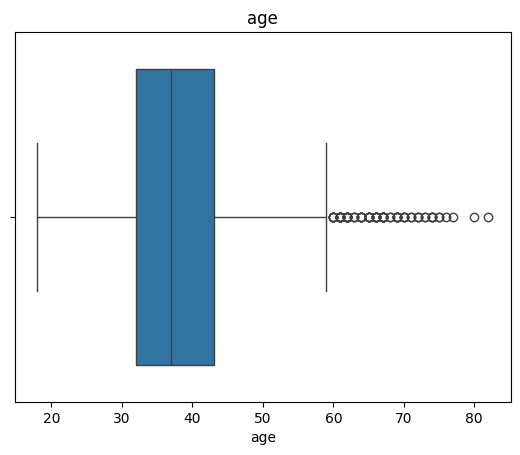

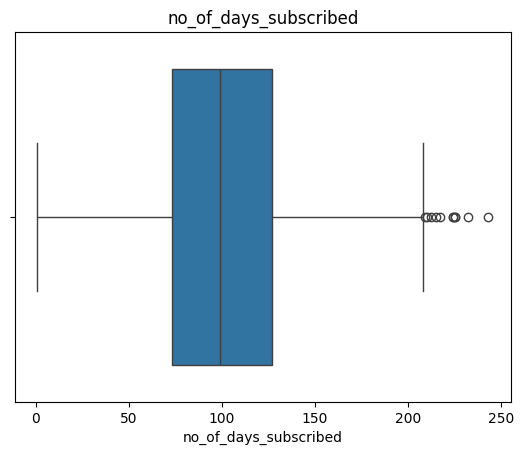

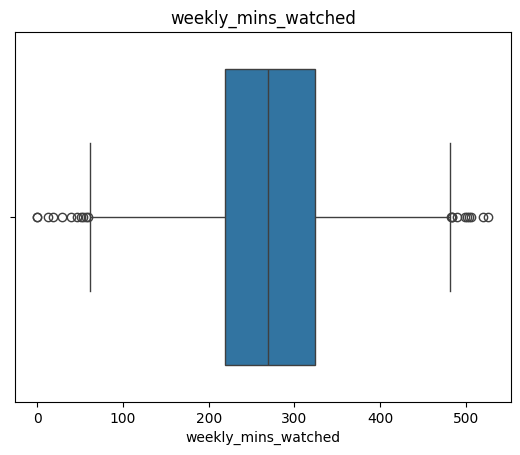

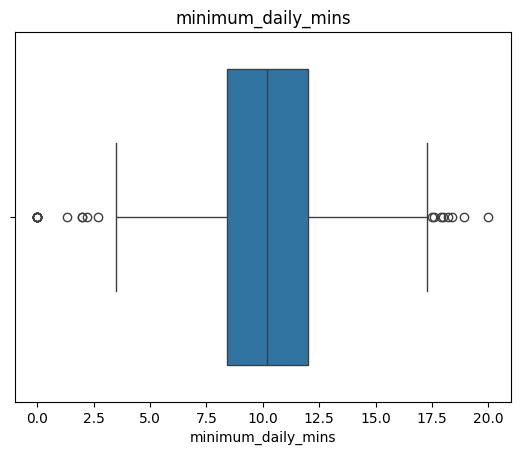

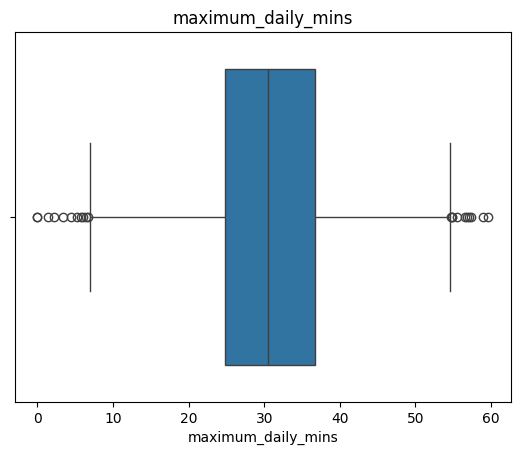

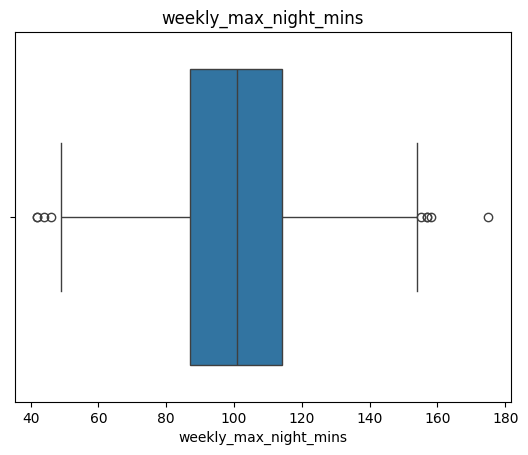

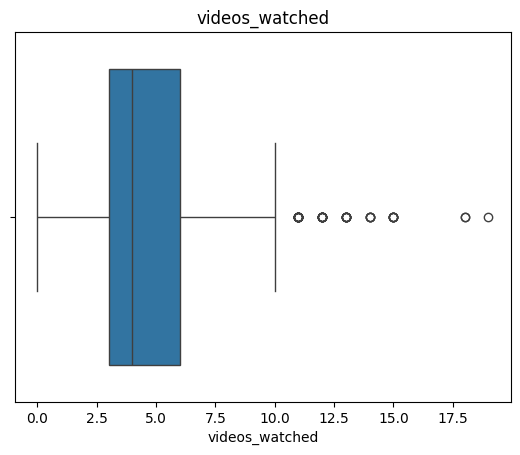

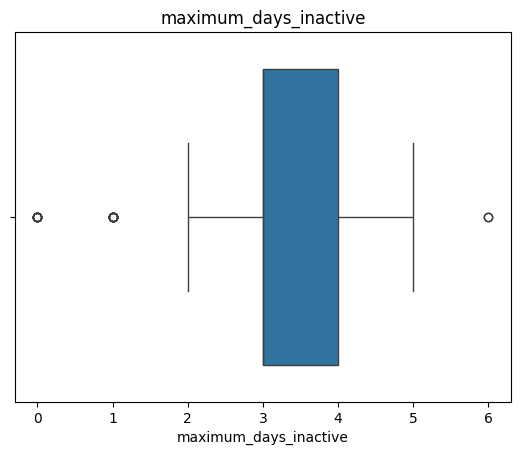

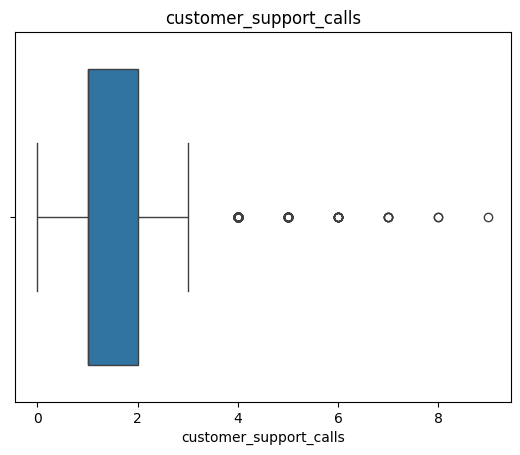

In [17]:
num_col = df.select_dtypes(exclude='object').columns.to_list()

for col_name in num_col[:-1]:
    sns.boxplot(x=df[col_name], orient='h')
    plt.title(col_name)
    plt.show()

In [18]:
df['churn'].value_counts()

churn
0    1665
1     253
Name: count, dtype: int64

In [19]:
def capping_outliers(col_name):
    # calculate q1 and q3 quartile using numpy
    q1 = np.percentile(df[col_name],25)
    q3 = np.percentile(df[col_name],75)

    iqr = q3-q1
    #LB & UB
    LB = q1 - 1.5 * iqr
    UB = q3 + 1.5 * iqr
    
    # capp
    df[col_name]= np.clip(df[col_name],LB,UB)

    # return df

for col_name in num_col[:-1]:
    capping_outliers(col_name)

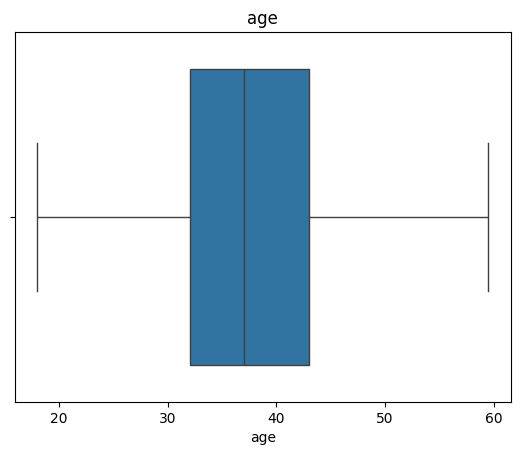

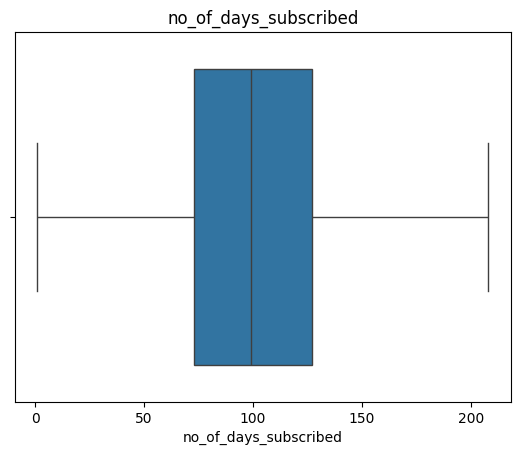

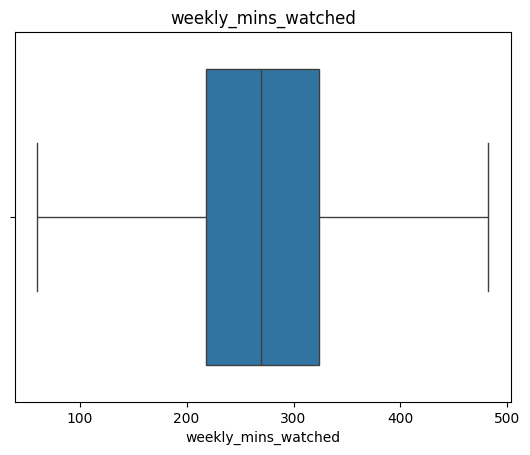

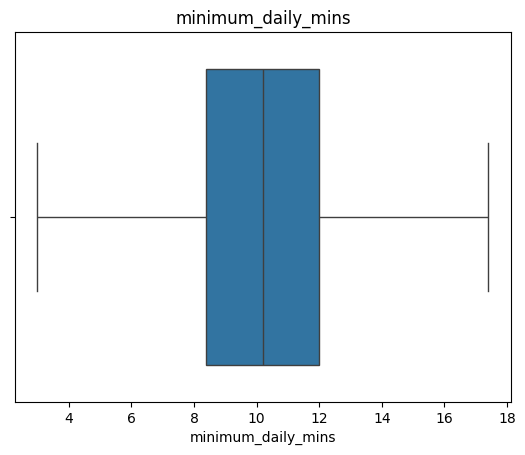

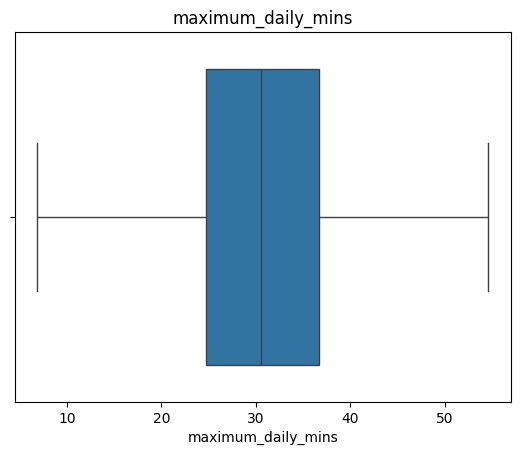

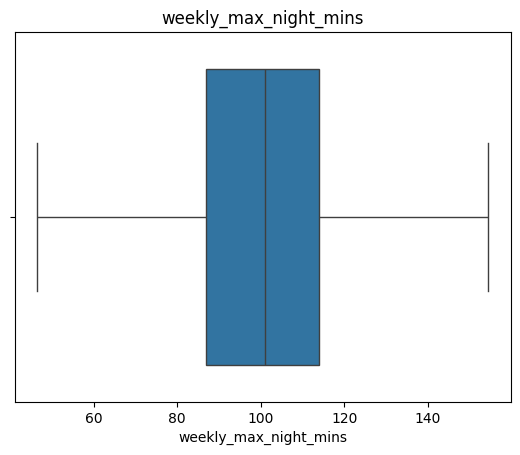

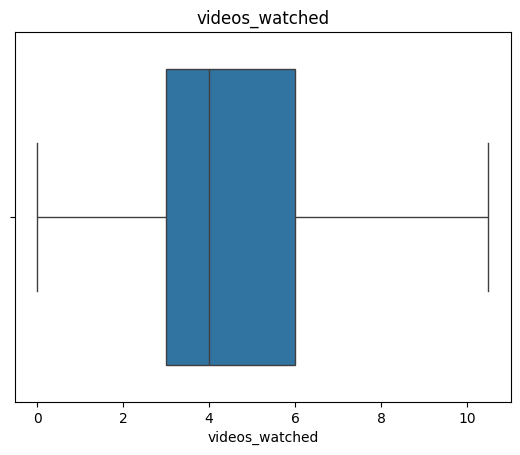

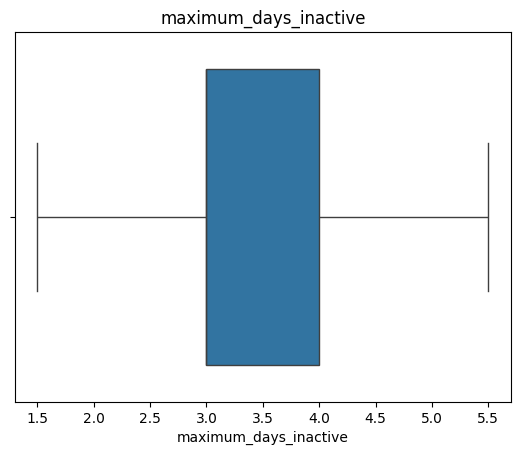

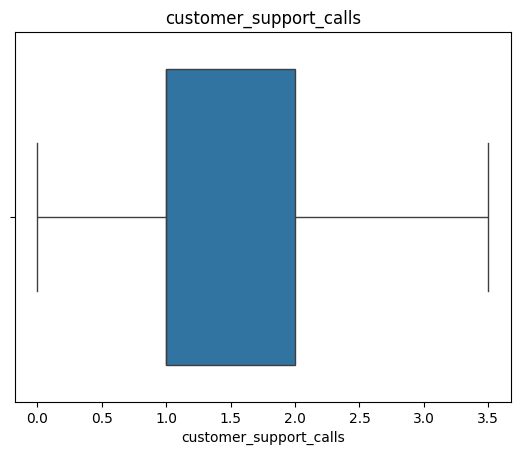

In [20]:
# num_col = df.select_dtypes(exclude='object').columns.to_list()

for col_name in num_col[:-1]:
    sns.boxplot(x=df[col_name], orient='h')
    plt.title(col_name)
    plt.show()

In [21]:
def outliers(col):
    Q1=np.quantile(df[col],0.25)
    Q2=np.quantile(df[col],0.5)
    Q3=np.quantile(df[col],0.75)
    IQR = (Q3-Q1)
    UB = Q3 + 1.5*IQR
    LB = Q1 - 1.5*IQR
    con1 = df[col] > UB
    con2 = df[col] < LB
    outliers_df=df[con1|con2]
    len(outliers_df)
    print(f'{col} has {len(outliers_df)} outliers' )
    
num_col= df.select_dtypes(exclude='object').columns
for col in num_col:
    outliers(col)

age has 0 outliers
no_of_days_subscribed has 0 outliers
weekly_mins_watched has 0 outliers
minimum_daily_mins has 0 outliers
maximum_daily_mins has 0 outliers
weekly_max_night_mins has 0 outliers
videos_watched has 0 outliers
maximum_days_inactive has 0 outliers
customer_support_calls has 0 outliers
churn has 253 outliers


In [22]:
df['churn'].value_counts()

churn
0    1665
1     253
Name: count, dtype: int64

In [23]:
df.head(2)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36.0,62,no,no,148.35,12.2,16.81,82.0,1.0,4.0,1.0,0
1,Female,39.0,149,no,no,294.45,7.7,33.37,87.0,3.0,3.0,2.0,0


In [24]:
#use label encoder for converting categorical values into numrical
from sklearn.preprocessing import LabelEncoder
cat_cols = df.select_dtypes(include="object").columns.to_list()
df[cat_cols]=df[cat_cols].apply(LabelEncoder().fit_transform)

In [25]:
df.head(2)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,0,36.0,62,0,0,148.35,12.2,16.81,82.0,1.0,4.0,1.0,0
1,0,39.0,149,0,0,294.45,7.7,33.37,87.0,3.0,3.0,2.0,0


In [26]:
# df.to_csv("churn_label.csv",index=False)

In [27]:
# Perform the ML Decision tree ,Logistic regression ,KNN and Random forest  with out hyper parameter tuning

In [28]:
# standardize and normalize the data 
from sklearn.preprocessing import StandardScaler,MinMaxScaler


In [29]:
# standardize the data 

scaler = StandardScaler()
cols_to_standarize = df.columns[:-1]
scaler.fit(df[cols_to_standarize])
# df[cols_to_standarize] = df[cols_to_standarize].apply(lambda x: (x - x.mean()) / x.std())
df[cols_to_standarize] = scaler.transform(df[cols_to_standarize])

In [30]:
df.head(2)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,-1.066883,-0.252273,-0.957286,-0.335453,-0.631648,-1.524047,0.741118,-1.524463,-0.943253,-1.499525,0.960545,-0.415743,0
1,-1.066883,0.069906,1.235057,-0.335453,-0.631648,0.306540,-0.920852,0.306373,-0.686820,-0.624736,-0.331861,0.491418,0


In [31]:
# df.to_csv('churn_standard.csv',index=False)

In [32]:
# # normalize the data 

# normal = MinMaxScaler()
# cols_to_normalize = df.columns[:-1]
# normal.fit(df[cols_to_normalize])
# df[cols_to_normalize] = normal.transform(df[cols_to_normalize])


In [33]:
# df.to_csv("churn_normal.csv",index=False)

In [34]:
df.head(2)

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,-1.066883,-0.252273,-0.957286,-0.335453,-0.631648,-1.524047,0.741118,-1.524463,-0.943253,-1.499525,0.960545,-0.415743,0
1,-1.066883,0.069906,1.235057,-0.335453,-0.631648,0.306540,-0.920852,0.306373,-0.686820,-0.624736,-0.331861,0.491418,0


# Model Developement without Hyperparameter

In [35]:
# input output data 
x = df.drop(columns='churn')
y = df['churn']

In [36]:
x

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls
0,-1.066883,-0.252273,-0.957286,-0.335453,-0.631648,-1.524047,0.741118,-1.524463,-0.943253,-1.499525,0.960545,-0.415743
1,-1.066883,0.069906,1.235057,-0.335453,-0.631648,0.306540,-0.920852,0.306373,-0.686820,-0.624736,-0.331861,0.491418
2,-1.066883,2.271467,0.655472,-0.335453,-0.631648,-2.288984,0.630320,-2.289522,-0.481674,-1.499525,0.960545,1.852161
3,-1.066883,-1.540992,0.781469,-0.335453,1.583161,0.642962,-0.256064,0.642468,0.082478,-0.187341,-0.331861,1.398580
4,-1.066883,0.177300,2.293430,-0.335453,-0.631648,-0.338112,0.260993,-0.338178,-0.891967,1.124843,-0.331861,-0.415743
...,...,...,...,...,...,...,...,...,...,...,...,...
1913,0.937310,-0.681846,-0.982486,-0.335453,-0.631648,-2.537072,-0.145266,-2.537171,-0.327814,0.687449,-0.331861,0.491418
1914,0.937310,1.143838,-1.259679,2.981040,1.583161,2.388974,-0.810054,2.389280,0.441484,-0.624736,-0.331861,-1.322904
1915,-1.066883,0.392086,0.479077,-0.335453,1.583161,-1.168830,-0.957785,-1.168467,-1.250973,-0.624736,-0.331861,1.398580
1916,0.937310,0.714266,0.680672,-0.335453,-0.631648,0.043417,-0.329929,0.043246,0.800490,-0.624736,-0.331861,-0.415743


In [37]:
y

0       0
1       0
2       1
3       0
4       0
       ..
1913    0
1914    0
1915    0
1916    0
1917    1
Name: churn, Length: 1918, dtype: int32

In [38]:
# train test split 

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=1234)

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1534, 12)
(384, 12)
(1534,)
(384,)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score ,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

Model Name : Logistic_Regression
accuray is: 86.46
F1 is: 23.53
Precision is: 53.33
Recall is: 15.09
-----------------------------------


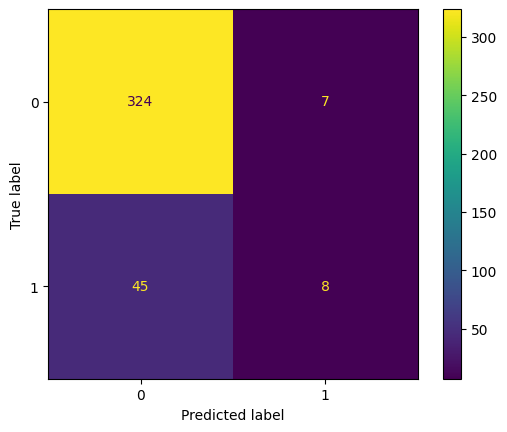

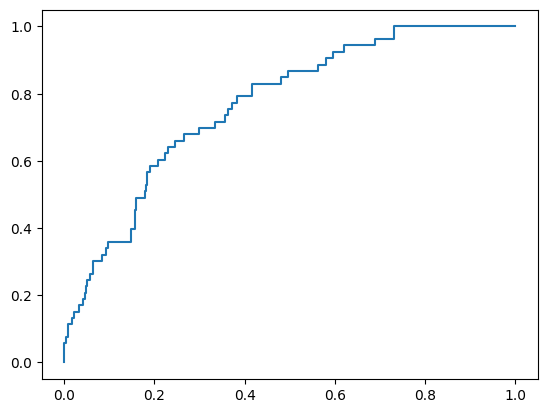

Model Name : Descision_terr
accuray is: 88.54
F1 is: 56.0
Precision is: 59.57
Recall is: 52.83
-----------------------------------


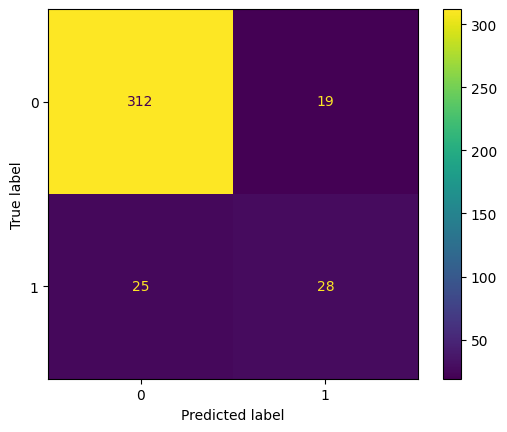

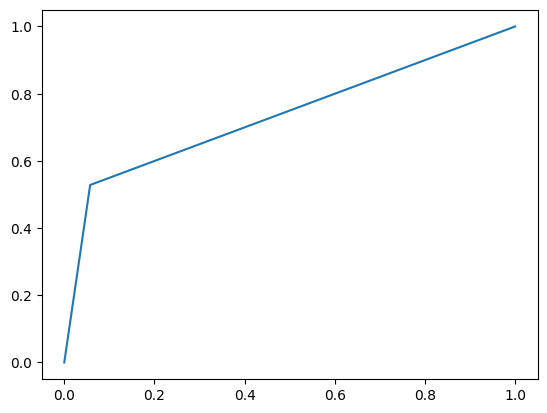

Model Name : KNN
accuray is: 88.28
F1 is: 36.62
Precision is: 72.22
Recall is: 24.53
-----------------------------------


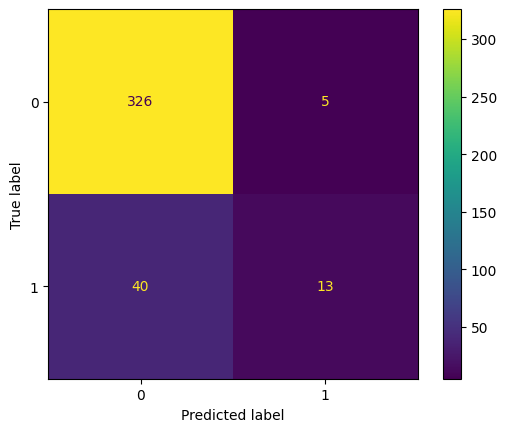

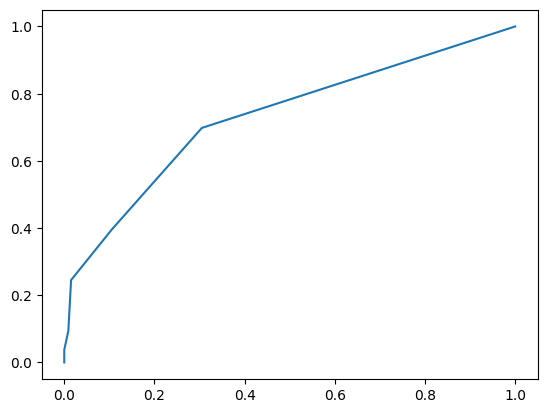

Model Name : Random_Forest
accuray is: 92.97
F1 is: 67.47
Precision is: 93.33
Recall is: 52.83
-----------------------------------


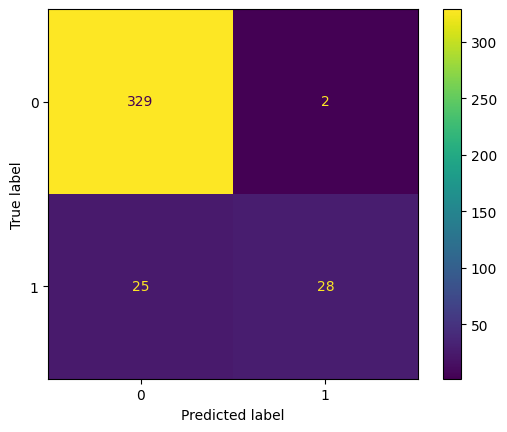

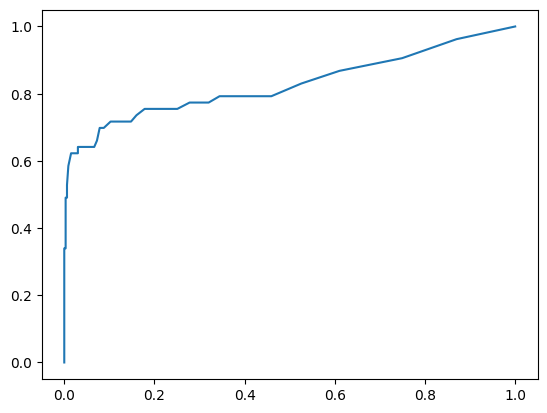

In [41]:
models = {
    'Logistic_Regression': LogisticRegression(),
    'Descision_terr': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Random_Forest': RandomForestClassifier()
}

for model_name, model in models.items():
    model.fit (x_train,y_train)

     #Make predictions on the test data
    y_pred = model.predict(x_test)


    acc_log= round(accuracy_score(y_test,y_pred)*100,2)
    f1_log=round(f1_score(y_test,y_pred)*100,2)
    precision_log=round(precision_score(y_test,y_pred)*100,2)
    recall_log=round(recall_score(y_test,y_pred)*100,2)
    print('Model Name :',model_name)
    print("accuray is:",acc_log)
    print("F1 is:",f1_log)
    print("Precision is:",precision_log)
    print("Recall is:",recall_log)
    print("-----------------------------------")


    cmt=confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(cmt).plot()
    plt.grid(False)
    plt.show()

    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    # print('Model name :',model_name)
    # print("True negative:",tn)
    # print("False postive:",fp)
    # print("False negative:",fn)
    # print("True postive:",tp)
    # print("---------------------------------------")

    y_predict_prob = model.predict_proba(x_test)
    y_predict_prob


    fpr, tpr, thresholds = roc_curve(y_test,y_predict_prob[:,1])
    plt.plot(fpr,tpr)
    plt.show()




    



# Model Developement with Hyperparameter tunning 

### Hyperparameter

In [49]:
from sklearn.model_selection import GridSearchCV,cross_val_score
def gird_fit_model(model, param_grid):
    grid_search_model = GridSearchCV(model, param_grid, scoring='accuracy', cv=5, verbose=True, n_jobs=-1)
    
    # Model fitting
    grid_search_model.fit(x_train, y_train)

    print(grid_search_model.best_params_)

    accuracy_list = cross_val_score(grid_search_model.best_estimator_,x_train, y_train, cv=5, scoring='accuracy')

    print(f'Cross Val Accuracy Mean : {accuracy_list.mean()}')
    print(f'Cross Val Best Score : {grid_search_model.best_score_}')

## Logistic Regression

In [51]:
LR = LogisticRegression()
LR


param_grid = {
    "C":[0.8,1.0,5,7,10], # regularization techinque 
    "max_iter":[100,200,300,500],  # to find the coefficient by gradient decent 
    "penalty":['l1','l2'], # regression technique 
    "random_state":[0,42]
}

gird_fit_model(LR , param_grid)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'random_state': 0}
Cross Val Accuracy Mean : 0.8741798130761534
Cross Val Best Score : 0.8741798130761534


# Descision Tere

In [52]:
DT = DecisionTreeClassifier()
DT


param_grid = {
    "criterion":['gini','entropy'], 
    "max_depth":[3,4,5,6,7,8],  
    "min_samples_split":[2,3,4],
    "min_samples_leaf":[1,2,3,4],
    "random_state":[0,42]    
}

gird_fit_model(DT , param_grid)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}
Cross Val Accuracy Mean : 0.9211343169189499
Cross Val Best Score : 0.9211343169189499


### KNN

In [57]:
KNN = KNeighborsClassifier()
KNN

param_grid = {
    "leaf_size":[10,20,30,40,50],
    "n_neighbors":[1,2,3,4,5],
    "p":[1,2,3,4,5]
}

gird_fit_model(KNN , param_grid)


Fitting 5 folds for each of 125 candidates, totalling 625 fits
{'leaf_size': 10, 'n_neighbors': 5, 'p': 1}
Cross Val Accuracy Mean : 0.8794064422728918
Cross Val Best Score : 0.8794064422728918


### Random Forest 

In [58]:
RF = RandomForestClassifier()
RF

param_grid = {
    'n_estimators': [100, 200, 300],
    "criterion":['gini','entropy'],
    'max_depth': [3, 5, 7, 10], 
    'max_features': ['sqrt', 'log2'], 
    'random_state': [0, 42] 
}

gird_fit_model(RF , param_grid)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 0}
Cross Val Accuracy Mean : 0.9296033722935428
Cross Val Best Score : 0.9296033722935428
